순위 1 : 이름(ykb2), 거리(0.29728291322615524)
순위 2 : 이름(류시원), 거리(0.4706830523083195)
순위 3 : 이름(김정훈), 거리(0.4880250748148967)
순위 4 : 이름(이완), 거리(0.5209001672449076)
순위 5 : 이름(유아인), 거리(0.5250615599507178)





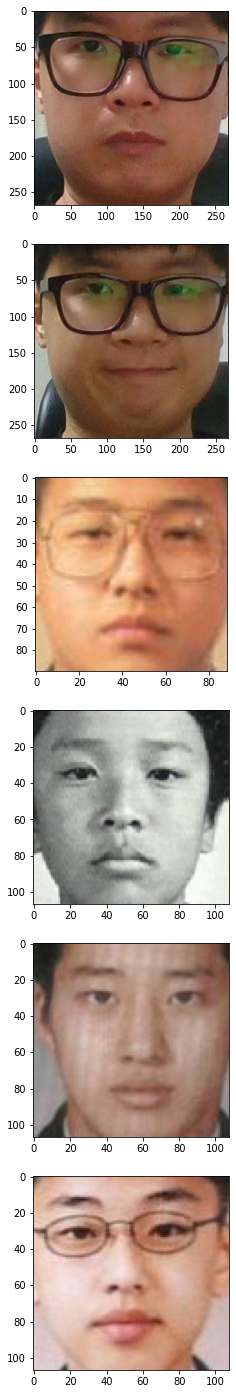

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
import numpy as np
from PIL import Image
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    return cropped_face

def get_face_embedding(face):
    return face_recognition.face_encodings(face)


def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict


def get_face_cropped_dict(dir_path,dir_path2):
    file_list = os.listdir(dir_path)
    cropped_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        img_path2 = os.path.join(dir_path2, file)
        face = get_cropped_face(img_path)
        pillow_image = Image.fromarray(face)
        pillow_image.save(img_path2)
        cropped_dict[os.path.splitext(file)[0]] = face
       
    return cropped_dict




def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)


def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 : 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
 
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(24,25))
    print()
    print()
    print()
   
    for i, ax in enumerate(axes.flatten()):        
              
        pillow_image=cropped_dict[sorted_faces[i][0]]
        ax.imshow(pillow_image)

    
    plt.show()
 
    fig.tight_layout()





dir_path = os.getenv('HOME')+'/aiffel/ykb/Ex5/face'
dir_path2 = os.getenv('HOME')+'/aiffel/ykb/Ex5/crop'
embedding_dict=get_face_embedding_dict(dir_path)
cropped_dict=get_face_cropped_dict(dir_path,dir_path2)





get_nearest_face('ykb')




# Ex05 고찰

## 어려웠던점

* 이미지의 얼굴부분을 다른 이미지로 저장한 후 순위대로 출력하는 부분에서 얼굴사진의 딕셔너리를 따로 만들어서 출력하려고 했으나 생각대로 안되어 출력이 잘되지 않았음.

* 첫 시도 때는 0.5이하로 닮은 연예인이 안나왔었음. 왜냐하면 연예인 사진 데이터가 20장밖에안되었기 때문이었음. 사진을 찾던중 얼굴이 잘 나오는 연예인 졸업사진 모음을 찾아서 비교 데이터를 40장까지 늘릴 수 있었음.

## 결과 해석
* 맨 위의 사진이 제 사진이고 하나씩 내려갈수록 닮은 순서대로 연예인사진이나옴.
* 결과가 잘 나오는 것인지 확인하기 위해 비교데이터에 내사진을 넣었음. 그랬더니 0.2가 나와 결과가 잘나온 것으로 판단됨.
* 비교데이터의 대부분이 배우, 가수의 졸업사진으로 결과가 잘(?)나왔으나 운동선수나 개그맨 사진을 넣었으면 더 닮은 사람이 나왔을 것이라 생각됨.